# ANÁLSIS DE DISCURSO DE CANDIDATOS A LA PRESIDENCIA DE COLOMBIA
## Técnica Análisis de sentimientos

# Librerias

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [65]:
import tweepy
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt 
from textblob import TextBlob
import plotly.express as px
import re

In [4]:
import nltk
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
AK = 'vS4oxRBGzr9ntxvAHBaHixeZO' #API_Key

AKS = 'YoMXdRTcPKjkRDVyRTC98Pqk1tGmwMYEbLlaaNc69HlylC0nXA' #API_Key_Secret

#Bearer_Token
BT = 'AAAAAAAAAAAAAAAAAAAAAL9DcQEAAAAAB4CguoAnqFHIO%2BN9GMXs98eY060%3DjxULVQTw1spgN9vaDj0Wj4PbpfT6NaEA30yJezenApwNmnsNxn'

AT = '1260182604-NAPUUvlONFc4KhpRkDLebb6DMlEcMc4qoCdI2QF' #Access_Token

ATS = 'CBIf22jBx6E7azRLj3MEJ1adsB7jd6NC0RobOuTd0NiFU' #Access_Token_Secret

In [6]:
auth = tweepy.OAuthHandler(AK, AKS)
auth.set_access_token(AT, ATS)

In [7]:
api = tweepy.API(auth, wait_on_rate_limit = True)

# Función Web Scraping cuentas de twitter de los candidatos.

In [8]:
def data(candi, items=1):
 
    df = pd.DataFrame(columns = ['candidato', 'fecha', 'tuit', 'likes', 'rt'])

    fecha = []
    texto = []
    likes = []
    rts = []
    candidato = []
    
    for tweet in tweepy.Cursor(api.user_timeline, screen_name = candi, tweet_mode = 'extended').items(items):
        candidato.append(candi)
        fecha.append(tweet._json['created_at']) 
        texto.append(tweet._json['full_text'])
        likes.append(tweet._json['favorite_count'])
        rts.append(tweet._json['retweet_count'])
 
    df['candidato'] = candidato
    df['fecha'] = fecha
    df['tuit'] = texto
    df['likes'] = likes
    df['rt'] = rts
    df['fecha'] = pd.to_datetime(df['fecha'], infer_datetime_format=True)
    df['fecha_ano'] = df['fecha'].dt.year.astype('string')
    df['fecha_mes'] = df['fecha'].dt.month_name()
    df['fecha_dia'] = df['fecha'].dt.day.astype('string')
    df['mes_dia'] = df['fecha_dia'].str.cat(df['fecha_mes'],sep="/")
    df['mes_ano'] = df['fecha_mes'].str.cat(df['fecha_ano'],sep="/")
    df['d_m_a'] = df['mes_dia'].str.cat(df['fecha_ano'],sep="/")
    
    return(df)
    

# Función para excluir del texto caracteres especiales

In [13]:
from unicodedata import normalize

def formatingText(text):
    text = text.lower()
    text = re.sub('<.*?>', ' ', text)
    text = re.sub(':.*?:', ' ', text)
    text = re.sub(r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", normalize( "NFD", text), 0, re.I)
    text = normalize( 'NFC', text)
    text = re.sub('[^a-z ]', ' ', text)
    return text

In [14]:
def clean_text(text):
    text = re.sub(r'@[A-Za-z09]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/?', '', text)

    return text

# CANDIDATOS

# Gustavo Petro

In [10]:
GP = data('petrogustavo', 1000)
GP.head(5)

candidato                     fecha  \
0  petrogustavo 2022-05-09 11:57:15+00:00   
1  petrogustavo 2022-05-09 00:45:26+00:00   
2  petrogustavo 2022-05-09 00:44:50+00:00   
3  petrogustavo 2022-05-08 23:35:57+00:00   
4  petrogustavo 2022-05-08 23:08:30+00:00   

                                                tuit  likes    rt fecha_ano  \
0  Criticar a la senadora  Isabel Zuleta por su l...   2105   772      2022   
1  RT @petrogustavo: Un camino por la vida https:...      0  2216      2022   
2  RT @PatriciaUribe07: Esta noche en  @NoticiasU...      0   590      2022   
3      Un camino por la vida https://t.co/3iWYRbzUVH   5744  2216      2022   
4  RT @PetroValleC: #Caravana 🚗🚲🛵 así vivimos la ...      0   494      2022   

  fecha_mes fecha_dia mes_dia   mes_ano       d_m_a  
0       May         9   9/May  May/2022  9/May/2022  
1       May         9   9/May  May/2022  9/May/2022  
2       May         9   9/May  May/2022  9/May/2022  
3       May         8   8/May  May/2022  8/May/2022  
4       May         8   8/May  May/2022  8/May/2022

In [127]:
data_GP = ' '.join(item for item in GP.tuit)
#data_GP

In [128]:
words = word_tokenize(clean_text(data_GP)) 
stop_words = stopwords.words('spanish') # palabaras excluir por se rconectores prepocisiones u otros en español


words = [w.lower() for w in words] # conversion a minuscula para cruce con stop words


words = [w for w in words if not w in stop_words and w.isalpha()] # exclusion de cosas que no 
#print(words)

In [73]:
no_words = ['RT', 'rt', 't', 'co', 'wy', 'https', 'tcw', 'x', 'zr', 'cnoubij', 'whzcjv', 'fc', 'pxr', 'tix', 'ma', 'mas', 'si',
           'petro', 'Petro', 'petropresidente']
words = [w for w in words if not w in no_words and w.isalpha()]

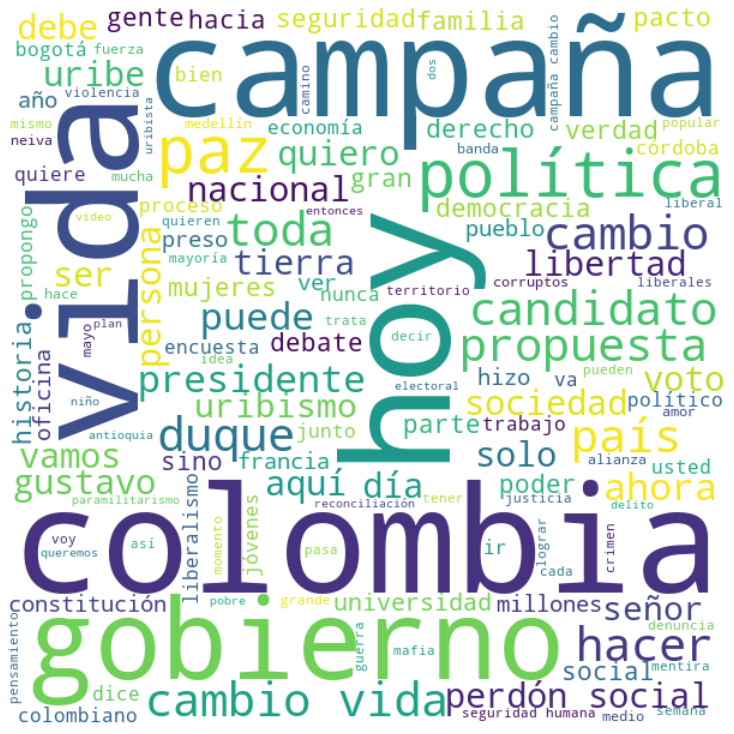

In [74]:
textoWC = ' '.join(words)

wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                stopwords = STOPWORDS,# max_words=200,
                relative_scaling =0,
                min_font_size = 10).generate(textoWC) 

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Fico Gutierrez

In [20]:
FG = data('FicoGutierrez', 1000)
FG.head(5)

candidato                     fecha  \
0  FicoGutierrez 2022-05-09 11:58:33+00:00   
1  FicoGutierrez 2022-05-09 11:58:25+00:00   
2  FicoGutierrez 2022-05-09 11:45:01+00:00   
3  FicoGutierrez 2022-05-09 11:33:58+00:00   
4  FicoGutierrez 2022-05-09 02:48:13+00:00   

                                                tuit  likes    rt fecha_ano  \
0  RT @lcvelez: "El quemar es lo de ellos. Quemar...      0   272      2022   
1  RT @lcvelez: "El video es muy claro. Yo me sol...      0    78      2022   
2  RT @lcvelez: A esta hora Federico Gutiérrez, c...      0   227      2022   
3  Dos miembros de la comunidad indígena Nukak no...    710   258      2022   
4  Yo no me creo un salvador, no sufro de superio...   8174  2413      2022   

  fecha_mes fecha_dia mes_dia   mes_ano       d_m_a  
0       May         9   9/May  May/2022  9/May/2022  
1       May         9   9/May  May/2022  9/May/2022  
2       May         9   9/May  May/2022  9/May/2022  
3       May         9   9/May  May/2022  9/May/2022  
4       May         9   9/May  May/2022  9/May/2022

In [129]:
data_FG = ' '.join(item for item in FG.tuit)
#data_FG

In [130]:
words = word_tokenize(clean_text(data_FG)) 
stop_words = stopwords.words('spanish') # palabaras excluir por se rconectores prepocisiones u otros en español


words = [w.lower() for w in words] # conversion a minuscula para cruce con stop words


words = [w for w in words if not w in stop_words and w.isalpha()] # exclusion de cosas que no 
#print(words)

In [77]:
no_words = ['RT', 'rt', 't', 'co', 'wy', 'https', 'tcw', 'x', 'zr', 'cnoubij', 'whzcjv', 'fc', 'pxr', 'tix', 'ma', 'mas', 'si',
            'forolr', 'Fico', 'fico', 'FicoGutierrez', 'ficopresidente']
words = [w for w in words if not w in no_words and w.isalpha()]

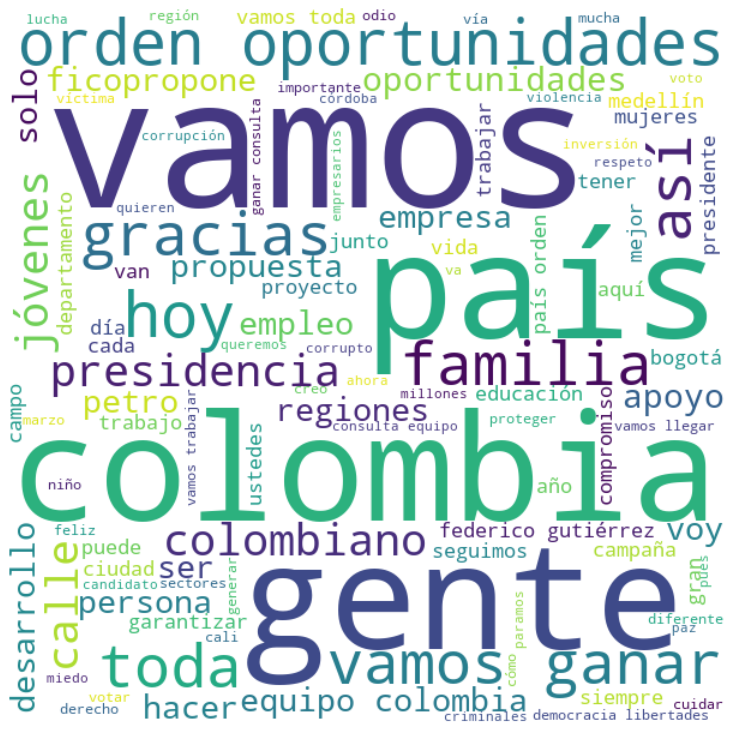

In [78]:
textoWC = ' '.join(words)

wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                stopwords = STOPWORDS,# max_words=200,
                relative_scaling =0,
                min_font_size = 10).generate(textoWC) 

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Rodolfo Hernández

In [25]:
RH = data('ingrodolfohdez', 1000)
RH.head(5)

candidato                     fecha  \
0  ingrodolfohdez 2022-05-09 12:28:35+00:00   
1  ingrodolfohdez 2022-05-09 12:01:42+00:00   
2  ingrodolfohdez 2022-05-09 11:58:45+00:00   
3  ingrodolfohdez 2022-05-09 10:38:44+00:00   
4  ingrodolfohdez 2022-05-09 10:22:30+00:00   

                                                tuit  likes   rt fecha_ano  \
0  RT @NoticiasCaracol: “Yo me reafirmo. Desde el...      0  103      2022   
1    #CampañaSuciaEs inflar candidatos en encuestas.    285   39      2022   
2  Ojalá encuentren a alguien que los mire como m...   1930  126      2022   
3  Buenos días. Para que no olviden: en segunda v...   1452  140      2022   
4  Carolina, mil gracias por su apoyo 🫶🏼 https://...     52    8      2022   

  fecha_mes fecha_dia mes_dia   mes_ano       d_m_a  
0       May         9   9/May  May/2022  9/May/2022  
1       May         9   9/May  May/2022  9/May/2022  
2       May         9   9/May  May/2022  9/May/2022  
3       May         9   9/May  May/2022  9/May/2022  
4       May         9   9/May  May/2022  9/May/2022

In [131]:
data_RH = ' '.join(item for item in RH.tuit)
#data_RH

In [132]:
words = word_tokenize(clean_text(data_RH)) 
stop_words = stopwords.words('spanish') # palabaras excluir por se rconectores prepocisiones u otros en español


words = [w.lower() for w in words] # conversion a minuscula para cruce con stop words


words = [w for w in words if not w in stop_words and w.isalpha()] # exclusion de cosas que no 
#print(words)

In [82]:
no_words = ['RT', 'rt', 't', 'co', 'wy', 'https', 'tcw', 'x', 'zr', 'cnoubij', 'whzcjv', 'fc', 'pxr', 'tix', 'ma', 'mas', 'si',
           'rodolfopresidente', 'rodolfohernandez', 'ligaanticorrupcion', 'rodolfo hernández', 'ingrodolfo','hable ingeniero',
           'ingeniero', 'rodolfo', 'hernández']
words = [w for w in words if not w in no_words and w.isalpha()]

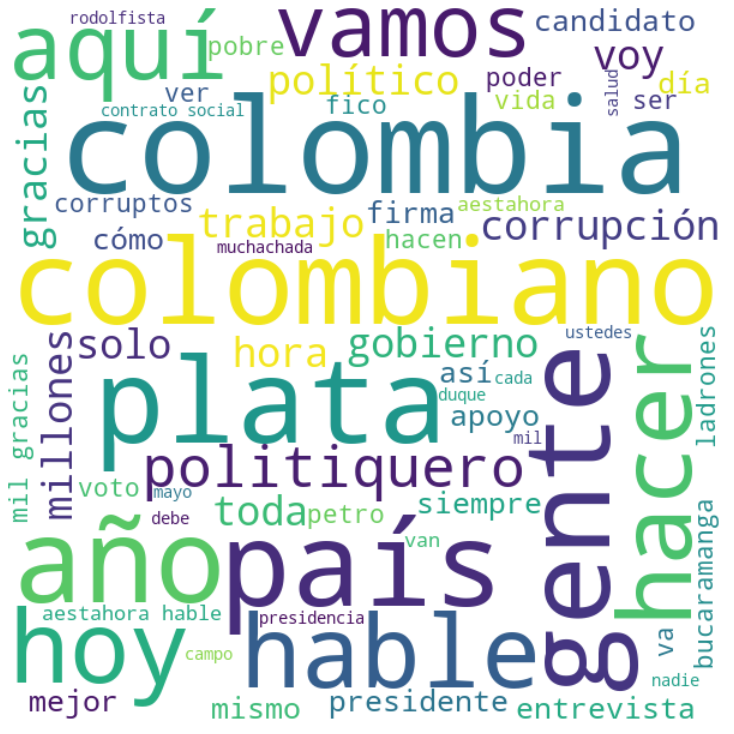

In [83]:
textoWC = ' '.join(words)

wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                stopwords = STOPWORDS,# max_words=200,
                relative_scaling =0,
                min_font_size = 10).generate(textoWC) 

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Sergio Fajardo

In [30]:
SF = data('sergio_fajardo', 1000)
SF.head(5)

candidato                     fecha  \
0  sergio_fajardo 2022-05-09 09:16:20+00:00   
1  sergio_fajardo 2022-05-09 03:17:14+00:00   
2  sergio_fajardo 2022-05-09 03:05:40+00:00   
3  sergio_fajardo 2022-05-09 03:01:50+00:00   
4  sergio_fajardo 2022-05-09 02:14:56+00:00   

                                                tuit  likes    rt fecha_ano  \
0  RT @Eganbernal: Primera vez en pedales. \nAcá ...      0  1411      2022   
1  COHERENCIA + CONSISTENCIA = CONFIANZA. Lo que ...   1183   310      2022   
2  @mcarvajal28 Gracias Marcela por conocer nuest...    119    22      2022   
3  RT @mcarvajal28: @sergio_fajardo es el que más...      0   153      2022   
4  RT @jccardenas1965: Del debate ambiental de @N...      0    53      2022   

  fecha_mes fecha_dia mes_dia   mes_ano       d_m_a  
0       May         9   9/May  May/2022  9/May/2022  
1       May         9   9/May  May/2022  9/May/2022  
2       May         9   9/May  May/2022  9/May/2022  
3       May         9   9/May  May/2022  9/May/2022  
4       May         9   9/May  May/2022  9/May/2022

In [133]:
data_SF = ' '.join(item for item in SF.tuit)
#data_SF

In [134]:
words = word_tokenize(clean_text(data_SF)) 
stop_words = stopwords.words('spanish') # palabaras excluir por se rconectores prepocisiones u otros en español


words = [w.lower() for w in words] # conversion a minuscula para cruce con stop words


words = [w for w in words if not w in stop_words and w.isalpha()] # exclusion de cosas que no 
#print(words)

In [91]:
no_words = ['RT', 'rt', 't', 'co', 'wy', 'https', 'tcw', 'x', 'zr', 'cnoubij', 'whzcjv', 'fc', 'pxr', 'tix', 'ma', 'mas', 'si',
           'lavueltacaribe', 'remontada', 'fajardo', 'fajardopresidente', 'unidasconfajardo', 'cambiemosconfajardo']
words = [w for w in words if not w in no_words and w.isalpha()]

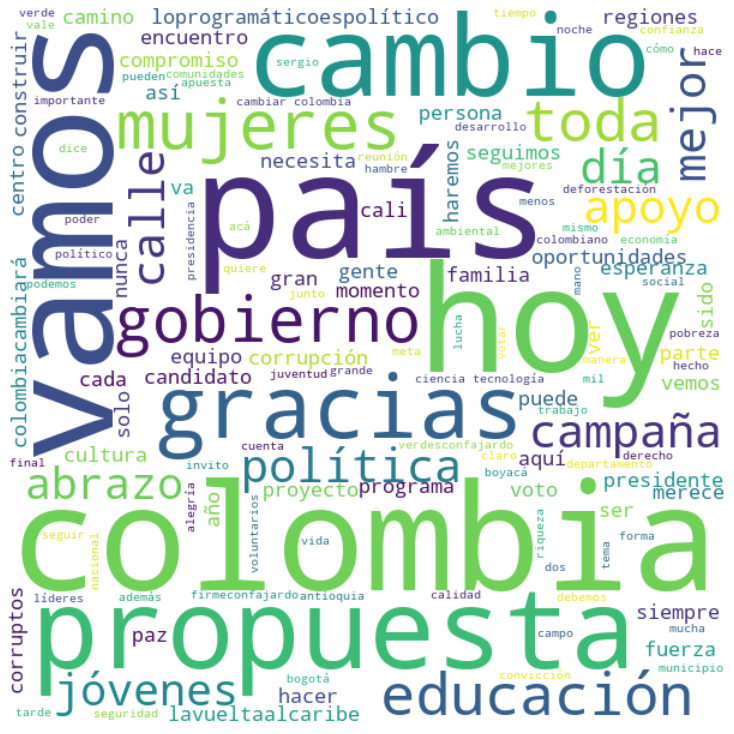

In [92]:
textoWC = ' '.join(words)

wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                stopwords = STOPWORDS,# max_words=200,
                relative_scaling =0,
                min_font_size = 10).generate(textoWC) 

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Ingrid Betancourt

In [35]:
IB = data('IBetancourtCol', 1000)
IB.head(5)

candidato                     fecha  \
0  IBetancourtCol 2022-05-09 03:07:14+00:00   
1  IBetancourtCol 2022-05-07 22:18:45+00:00   
2  IBetancourtCol 2022-05-06 11:27:56+00:00   
3  IBetancourtCol 2022-05-06 01:55:58+00:00   
4  IBetancourtCol 2022-05-05 22:02:28+00:00   

                                                tuit  likes  rt fecha_ano  \
0  RT @AlvaroGarciaJ: A las 7:30 p.m. estaremos #...      0   3      2022   
1  RT @RTVCco: ¡#ColombiaMiElección y la de todos...      0   7      2022   
2  La eliminación de la ley de garantías fue una ...     63  16      2022   
3  Estamos frente a maniobras con apariencia de l...     39  15      2022   
4  En debate con @urosario\n\nNuestra prioridad f...     34   5      2022   

  fecha_mes fecha_dia mes_dia   mes_ano       d_m_a  
0       May         9   9/May  May/2022  9/May/2022  
1       May         7   7/May  May/2022  7/May/2022  
2       May         6   6/May  May/2022  6/May/2022  
3       May         6   6/May  May/2022  6/May/2022  
4       May         5   5/May  May/2022  5/May/2022

In [135]:
data_IB = ' '.join(item for item in IB.tuit)
#data_IB

In [136]:
words = word_tokenize(clean_text(data_IB)) 
stop_words = stopwords.words('spanish') # palabaras excluir por se rconectores prepocisiones u otros en español


words = [w.lower() for w in words] # conversion a minuscula para cruce con stop words


words = [w for w in words if not w in stop_words and w.isalpha()] # exclusion de cosas que no 
#print(words)

In [96]:
no_words = ['RT', 'rt', 't', 'co', 'wy', 'https', 'tcw', 'x', 'zr', 'cnoubij', 'whzcjv', 'fc', 'pxr', 'tix', 'ma', 'mas', 'si',
           'ingrid', 'betancourt', 'ingridpresidenta', 'elexternadodebate', 'jaquealacorrupcion']
words = [w for w in words if not w in no_words and w.isalpha()]

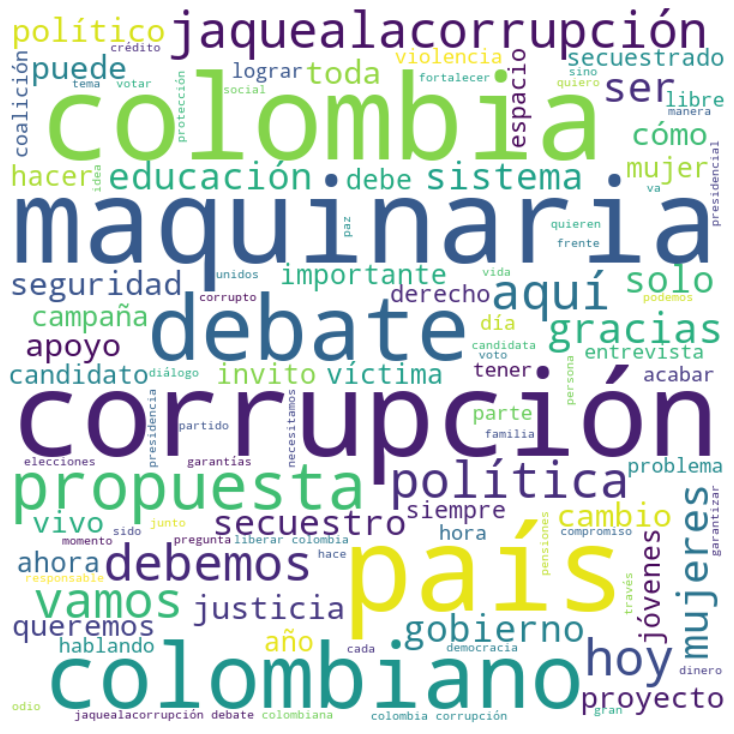

In [97]:
textoWC = ' '.join(words)

wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                stopwords = STOPWORDS,# max_words=200,
                relative_scaling =0,
                min_font_size = 10).generate(textoWC) 

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Enrique Gómez

In [40]:
EG = data('Enrique_GomezM', 1000)
EG.head(5)

candidato                     fecha  \
0  Enrique_GomezM 2022-05-08 19:52:00+00:00   
1  Enrique_GomezM 2022-05-08 16:35:43+00:00   
2  Enrique_GomezM 2022-05-08 15:47:24+00:00   
3  Enrique_GomezM 2022-05-08 12:23:08+00:00   
4  Enrique_GomezM 2022-05-07 20:27:06+00:00   

                                                tuit  likes    rt fecha_ano  \
0                                 @SectorPrdctvo 103      0     0      2022   
1  Hoy celebramos el #DíaDeLaMadre y también conm...    536   180      2022   
2  RT @MovSalvacionNal: El socialismo miente, dis...      0  3275      2022   
3  Si hemos sido y hemos podido es por ustedes. S...    191    57      2022   
4                                 @PaulinaSofiaTO ☺️      3     0      2022   

  fecha_mes fecha_dia mes_dia   mes_ano       d_m_a  
0       May         8   8/May  May/2022  8/May/2022  
1       May         8   8/May  May/2022  8/May/2022  
2       May         8   8/May  May/2022  8/May/2022  
3       May         8   8/May  May/2022  8/May/2022  
4       May         7   7/May  May/2022  7/May/2022

In [137]:
data_EG = ' '.join(item for item in EG.tuit)
#data_EG

In [138]:
words = word_tokenize(clean_text(data_EG)) 
stop_words = stopwords.words('spanish') # palabaras excluir por se rconectores prepocisiones u otros en español


words = [w.lower() for w in words] # conversion a minuscula para cruce con stop words


words = [w for w in words if not w in stop_words and w.isalpha()] # exclusion de cosas que no 
#print(words)

In [109]:
no_words = ['RT', 'rt', 't', 'co', 'wy', 'https', 'tcw', 'x', 'zr', 'cnoubij', 'whzcjv', 'fc', 'pxr', 'tix', 'ma', 'mas', 'si',
           'salvacion nacional', 'salvacion', 'nacional', 'salvación', 'eldebatepacifico', 'enrique gomez', 'enrique', 'gomez',
           'gómez', 'enrique gómez', 'eldebatedelpacífico']
words = [w for w in words if not w in no_words and w.isalpha()]

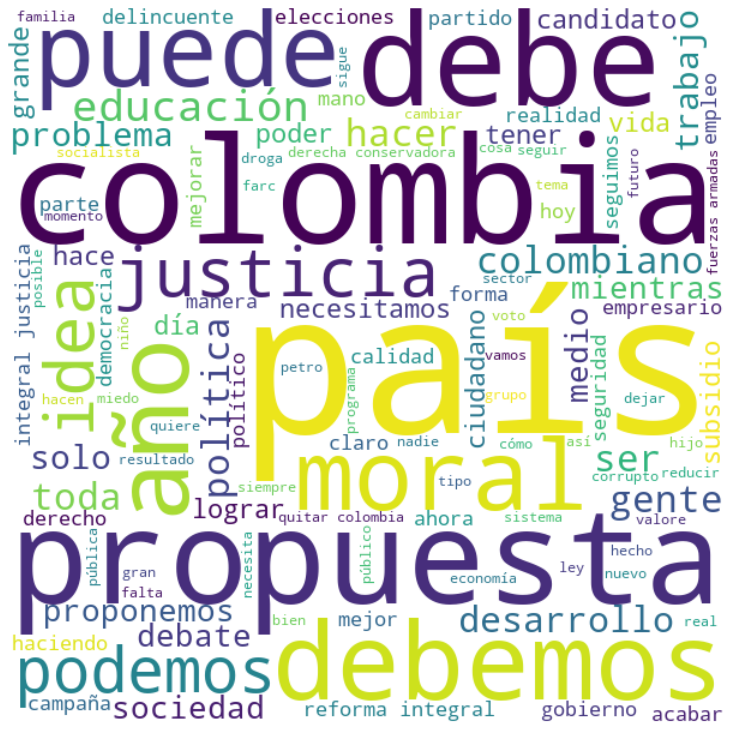

In [110]:
textoWC = ' '.join(words)

wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                stopwords = STOPWORDS,# max_words=200,
                relative_scaling =0,
                min_font_size = 10).generate(textoWC) 

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Jhon Milton Rodriguez

In [46]:
JM = data('JohnMiltonR_', 1000)
JM.head(5)

candidato                     fecha  \
0  JohnMiltonR_ 2022-05-09 12:54:49+00:00   
1  JohnMiltonR_ 2022-05-09 03:21:14+00:00   
2  JohnMiltonR_ 2022-05-09 03:20:47+00:00   
3  JohnMiltonR_ 2022-05-09 03:20:30+00:00   
4  JohnMiltonR_ 2022-05-09 03:09:51+00:00   

                                                tuit  likes  rt fecha_ano  \
0  RT @CaracolRadio: #ElGranReto | "Las encuestan...      0   1      2022   
1  RT @berneos: @jDavidGutierrez @JohnMiltonR_ ht...      0  13      2022   
2  RT @SolmaSaumeth: @lasillavacia El que defiend...      0   7      2022   
3  RT @nina2408: @lasillavacia Eso no es cierto. ...      0   4      2022   
4  RT @darytob: Si si si. El es mi candidato. Sus...      0   8      2022   

  fecha_mes fecha_dia mes_dia   mes_ano       d_m_a  
0       May         9   9/May  May/2022  9/May/2022  
1       May         9   9/May  May/2022  9/May/2022  
2       May         9   9/May  May/2022  9/May/2022  
3       May         9   9/May  May/2022  9/May/2022  
4       May         9   9/May  May/2022  9/May/2022

In [139]:
data_JM = ' '.join(item for item in JM.tuit)
#data_JM

In [140]:
words = word_tokenize(clean_text(data_JM)) 
stop_words = stopwords.words('spanish') # palabaras excluir por se rconectores prepocisiones u otros en español


words = [w.lower() for w in words] # conversion a minuscula para cruce con stop words


words = [w for w in words if not w in stop_words and w.isalpha()] # exclusion de cosas que no 
#print(words)

In [118]:
no_words = ['RT', 'rt', 't', 'co', 'wy', 'https', 'tcw', 'x', 'zr', 'cnoubij', 'whzcjv', 'fc', 'pxr', 'tix', 'ma', 'mas', 'si',
           'john', 'milton', 'rodriguez', 'rodríguez', 'john milton', 'johnmiltonpresidenteva', 'johnmiltonpresidente', 'envivo',
           'alaire', 'forolr']
words = [w for w in words if not w in no_words and w.isalpha()]

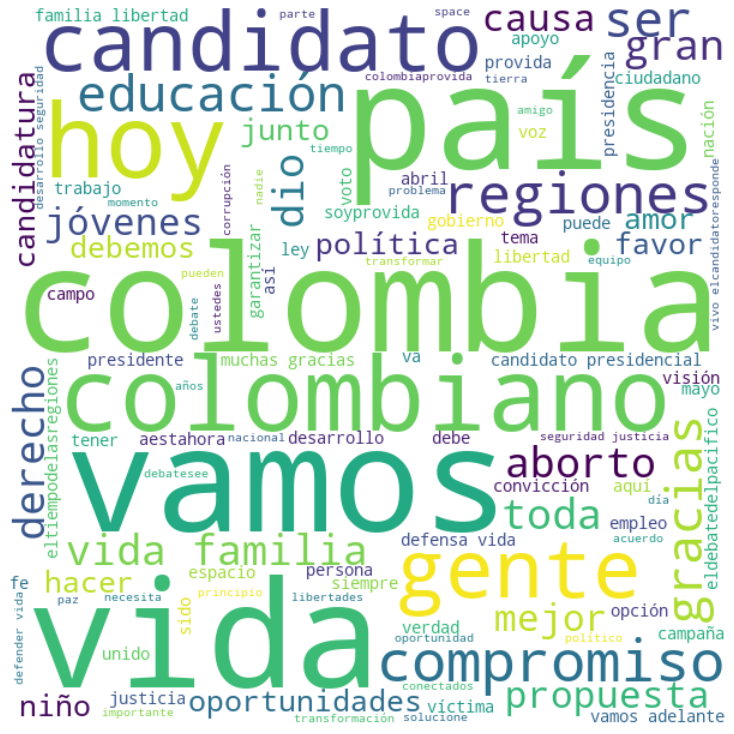

In [119]:
textoWC = ' '.join(words)

wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                stopwords = STOPWORDS,# max_words=200,
                relative_scaling =0,
                min_font_size = 10).generate(textoWC) 

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Luis Perez

In [51]:
LUPE = data('Luis_Perez_G', 1000)
LUPE.head(5)

candidato                     fecha  \
0  Luis_Perez_G 2022-05-06 17:41:33+00:00   
1  Luis_Perez_G 2022-05-06 17:22:28+00:00   
2  Luis_Perez_G 2022-05-06 17:01:51+00:00   
3  Luis_Perez_G 2022-05-04 14:21:30+00:00   
4  Luis_Perez_G 2022-05-04 14:21:30+00:00   

                                                tuit  likes  rt fecha_ano  \
0  El gobierno frente al paro armado del Clan del...     20   4      2022   
1  El clan del golfo tiene en jaque a 9 departame...     33   9      2022   
2  El gobierno frente al paro armado del Clan del...      5   2      2022   
3  Las sociedades enfermas matan a sus mejores di...      9   2      2022   
4  Estremecedora la amenaza de muerte a @petrogus...     33   5      2022   

  fecha_mes fecha_dia mes_dia   mes_ano       d_m_a  
0       May         6   6/May  May/2022  6/May/2022  
1       May         6   6/May  May/2022  6/May/2022  
2       May         6   6/May  May/2022  6/May/2022  
3       May         4   4/May  May/2022  4/May/2022  
4       May         4   4/May  May/2022  4/May/2022

In [141]:
data_LUPE = ' '.join(item for item in LUPE.tuit)
#data_LUPE

In [142]:
words = word_tokenize(clean_text(data_LUPE)) 
stop_words = stopwords.words('spanish') # palabaras excluir por se rconectores prepocisiones u otros en español


words = [w.lower() for w in words] # conversion a minuscula para cruce con stop words


words = [w for w in words if not w in stop_words and w.isalpha()] # exclusion de cosas que no 
#print(words)

In [125]:
no_words = ['RT', 'rt', 't', 'co', 'wy', 'https', 'tcw', 'x', 'zr', 'cnoubij', 'whzcjv', 'fc', 'pxr', 'tix', 'ma', 'mas', 'si',
           'luis', 'perez', 'pérez', 'luis perez', 'luis pérez', 'luispérezpresidente', 'cumplelapalabra', 'piensaengrande']
words = [w for w in words if not w in no_words and w.isalpha()]

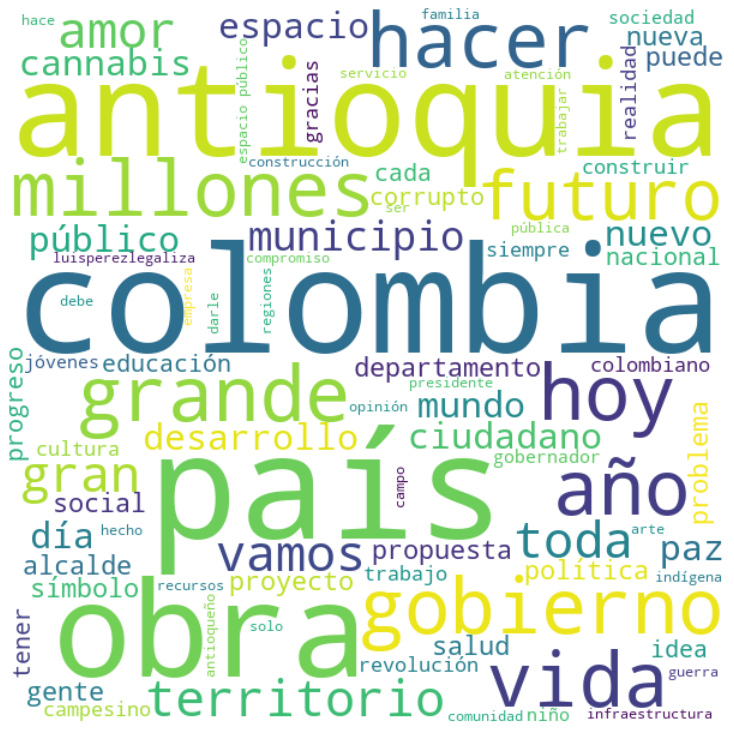

In [126]:
textoWC = ' '.join(words)

wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                stopwords = STOPWORDS,# max_words=200,
                relative_scaling =0,
                min_font_size = 10).generate(textoWC) 

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Análisis de sentimientos

In [58]:
df = pd.concat([GP, FG, RH, SF, IB, EG, JM, LUPE])
#df = df.drop(columns=['fecha','fecha_dia'])
df.head(5)

candidato                     fecha  \
0  petrogustavo 2022-05-09 11:57:15+00:00   
1  petrogustavo 2022-05-09 00:45:26+00:00   
2  petrogustavo 2022-05-09 00:44:50+00:00   
3  petrogustavo 2022-05-08 23:35:57+00:00   
4  petrogustavo 2022-05-08 23:08:30+00:00   

                                                tuit  likes    rt fecha_ano  \
0  Criticar a la senadora  Isabel Zuleta por su l...   2105   772      2022   
1  RT @petrogustavo: Un camino por la vida https:...      0  2216      2022   
2  RT @PatriciaUribe07: Esta noche en  @NoticiasU...      0   590      2022   
3      Un camino por la vida https://t.co/3iWYRbzUVH   5744  2216      2022   
4  RT @PetroValleC: #Caravana 🚗🚲🛵 así vivimos la ...      0   494      2022   

  fecha_mes fecha_dia mes_dia   mes_ano       d_m_a  
0       May         9   9/May  May/2022  9/May/2022  
1       May         9   9/May  May/2022  9/May/2022  
2       May         9   9/May  May/2022  9/May/2022  
3       May         8   8/May  May/2022  8/May/2022  
4       May         8   8/May  May/2022  8/May/2022

In [60]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [61]:
df['tuit'] = df['tuit'].apply(clean_text)
df.head()

candidato                     fecha  \
0  petrogustavo 2022-05-09 11:57:15+00:00   
1  petrogustavo 2022-05-09 00:45:26+00:00   
2  petrogustavo 2022-05-09 00:44:50+00:00   
3  petrogustavo 2022-05-08 23:35:57+00:00   
4  petrogustavo 2022-05-08 23:08:30+00:00   

                                                tuit  likes    rt fecha_ano  \
0  Criticar a la senadora  Isabel Zuleta por su l...   2105   772      2022   
1            : Un camino por la vida t.co/3iWYRbzUVH      0  2216      2022   
2  7: Esta noche en    Obispo de Quibdó urge diál...      0   590      2022   
3              Un camino por la vida t.co/3iWYRbzUVH   5744  2216      2022   
4  : Caravana 🚗🚲🛵 así vivimos la gran Petro Carav...      0   494      2022   

  fecha_mes fecha_dia mes_dia   mes_ano       d_m_a  
0       May         9   9/May  May/2022  9/May/2022  
1       May         9   9/May  May/2022  9/May/2022  
2       May         9   9/May  May/2022  9/May/2022  
3       May         8   8/May  May/2022  8/May/2022  
4       May         8   8/May  May/2022  8/May/2022

In [62]:
df['Subjetividad'] = df['tuit'].apply(get_subjectivity)
df['Polaridad'] = df['tuit'].apply(get_polarity)

df.head(5)

candidato                     fecha  \
0  petrogustavo 2022-05-09 11:57:15+00:00   
1  petrogustavo 2022-05-09 00:45:26+00:00   
2  petrogustavo 2022-05-09 00:44:50+00:00   
3  petrogustavo 2022-05-08 23:35:57+00:00   
4  petrogustavo 2022-05-08 23:08:30+00:00   

                                                tuit  likes    rt fecha_ano  \
0  Criticar a la senadora  Isabel Zuleta por su l...   2105   772      2022   
1            : Un camino por la vida t.co/3iWYRbzUVH      0  2216      2022   
2  7: Esta noche en    Obispo de Quibdó urge diál...      0   590      2022   
3              Un camino por la vida t.co/3iWYRbzUVH   5744  2216      2022   
4  : Caravana 🚗🚲🛵 así vivimos la gran Petro Carav...      0   494      2022   

  fecha_mes fecha_dia mes_dia   mes_ano       d_m_a  Subjetividad  Polaridad  
0       May         9   9/May  May/2022  9/May/2022      0.066667   0.033333  
1       May         9   9/May  May/2022  9/May/2022      0.000000   0.000000  
2       May         9   9/May  May/2022  9/May/2022      0.000000   0.000000  
3       May         8   8/May  May/2022  8/May/2022      0.000000   0.000000  
4       May         8   8/May  May/2022  8/May/2022      0.000000   0.000000

In [63]:
def sentimiento(valor):
    if valor < 0:
        return 'Negativo'
    elif valor > 0:
        return 'Positivo'
    else:
        'Neutral'

df['Sentimiento'] = df['Polaridad'].apply(sentimiento)

df.head(5)

candidato                     fecha  \
0  petrogustavo 2022-05-09 11:57:15+00:00   
1  petrogustavo 2022-05-09 00:45:26+00:00   
2  petrogustavo 2022-05-09 00:44:50+00:00   
3  petrogustavo 2022-05-08 23:35:57+00:00   
4  petrogustavo 2022-05-08 23:08:30+00:00   

                                                tuit  likes    rt fecha_ano  \
0  Criticar a la senadora  Isabel Zuleta por su l...   2105   772      2022   
1            : Un camino por la vida t.co/3iWYRbzUVH      0  2216      2022   
2  7: Esta noche en    Obispo de Quibdó urge diál...      0   590      2022   
3              Un camino por la vida t.co/3iWYRbzUVH   5744  2216      2022   
4  : Caravana 🚗🚲🛵 así vivimos la gran Petro Carav...      0   494      2022   

  fecha_mes fecha_dia mes_dia   mes_ano       d_m_a  Subjetividad  Polaridad  \
0       May         9   9/May  May/2022  9/May/2022      0.066667   0.033333   
1       May         9   9/May  May/2022  9/May/2022      0.000000   0.000000   
2       May         9   9/May  May/2022  9/May/2022      0.000000   0.000000   
3       May         8   8/May  May/2022  8/May/2022      0.000000   0.000000   
4       May         8   8/May  May/2022  8/May/2022      0.000000   0.000000   

  Sentimiento  
0    Positivo  
1        None  
2        None  
3        None  
4        None

In [68]:
df.to_csv('candidatos.csv', sep=',')

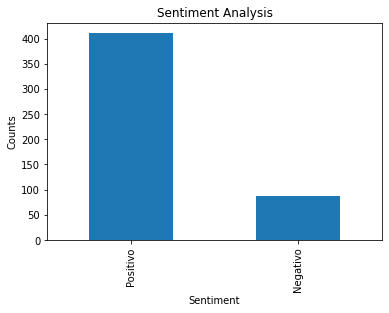

In [64]:
df['Sentimiento'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Sentimiento'].value_counts().plot(kind='bar')
plt.show()

In [67]:
fig = px.bar(df.dropna(subset=['Sentimiento']), x='Sentimiento', facet_col='candidato', facet_col_wrap=2, height=800, title='Tuits positivos y negativos por candidato', color='candidato', template='seaborn', text='Sentimiento', color_discrete_sequence=px.colors.qualitative.Antique[::-1])
fig.update_layout(legend_title_text='Candidato')
fig

In [69]:
fig = px.violin(df, x='candidato', y='Polaridad', color='candidato', height=400, title='Polaridad por candidato ', template='ggplot2')
fig

In [70]:
fig = px.scatter(df, x='Subjetividad', y='Polaridad', color='candidato', facet_row='candidato', height=1700, title='Subjetividad vs Polaridad de los tuits por Candidato', template='plotly_dark')
fig